## Problem Set #2
MACS 30100, Dr. Evans 

Shuting Chen 

In [41]:
# Import useful packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.optimize as opt

%matplotlib inline

### 1. Some income data, lognormal distribution, and hypothesis testing 

In [42]:
# Import data 
incomes = np.loadtxt('incomes.txt')

#### Part (a). Plot a histogram for the given data 

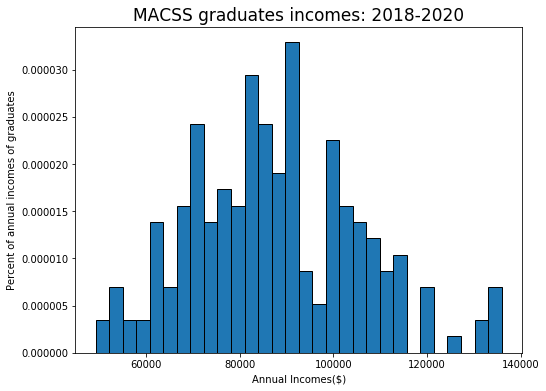

In [43]:
plt.figure(figsize=(8,6))
num_bins = 30
count, bins, ignored = plt.hist(incomes, num_bins, normed = True, histtype='bar', ec='black')
plt.title('MACSS graduates incomes: 2018-2020', fontsize=17)
plt.xlabel('Annual Incomes($)')
plt.ylabel('Percent of annual incomes of graduates')
plt.show()

#### Part (b). Plot the lognormal PDF and compute log likelihood value 

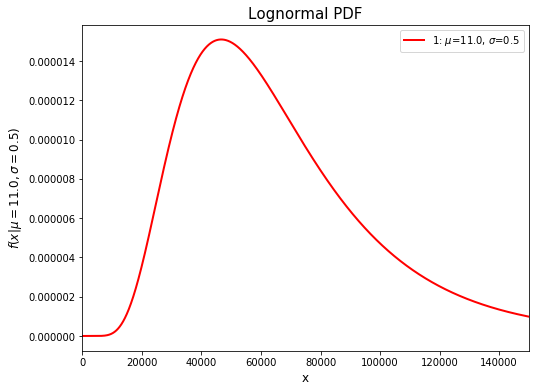

The log likelihood value for this distribution and given data is -2385.8570.


In [44]:
def log_norm_pdf(xvals, mu, sigma, cutoff):
    '''
    ----------------------------------------------------------------------
    Generate pdf values from the lognormal pdf with mean mu and standard
    deviation sigma. This function does the samething as 
    sts.lognorm.pdf(xvals, s = sigma, scale = np.exp(mu)).
    ----------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the log-normally distributed random
             variable
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally 
             distributed random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    RETURNS: pdf_vals
    ----------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
        
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi))) *\
                np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))    
    
    return pdf_vals

def log_lik(xvals, mu, sigma, cutoff):
    '''
    ----------------------------------------------------------------------
    Compute the log likelihood values for data(xvals) given lognormal
    distribution parameters mu and sigma.
    ---------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the log-normally distributed random
             variable
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally 
             distributed random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
             
    RETURNS: log_lik_val 
    ---------------------------------------------------------------------
    '''
    pdf_vals = log_norm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

dist_pts = np.linspace(1e-10, 150000, 15000)
mu_1 = 11.0
sig_1 = 0.5
plt.figure(figsize=(8,6))
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_1, sig_1, 150000),
         linewidth=2, color='r', label='1: $\mu$=11.0, $\sigma$=0.5')
plt.xlim([0, 150000])
plt.xlabel('x', fontsize=12)
plt.ylabel('$f(x|\mu=11.0,\sigma=0.5)$', fontsize=12)
plt.title('Lognormal PDF', fontsize=15)
plt.legend(loc='upper right')
plt.show()

print('The log likelihood value for this distribution and given data is {:.4f}.'\
          .format(log_lik(incomes, mu_1, sig_1, 150000)))


#### Part (c). 

11.3590221812 0.208177268981
The ML estimates for mean and standard deviation are 11.359 and 0.208 respectively.
The value of log likelihood function is -2241.7193.
The variance-covariance matrix is
[[  2.52831353e-04  -2.76208826e-05]
 [ -2.76208826e-05   1.30457089e-04]]


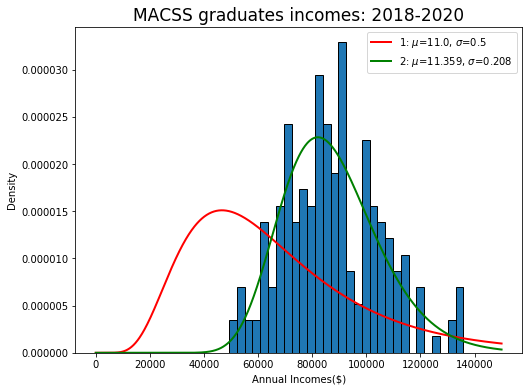

In [39]:
# The criterion function 
def crit_income(params, *args):
    '''
    ----------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    ----------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the log-normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log-normally 
             distributed random variable
    args   = (xvals, cutoff)
    xvals  = (N,) vector, values of the log-normally distributed random
             variable
    
    RETURNS: neg_log_lik_val
    ----------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

mu_init = mu_1
sig_init = sig_1
mle_args = (incomes, 150000)
bnds = ((None, None), (0.1, None))
params_init = np.array([mu_init, sig_init])
results = opt.minimize(crit_income, params_init, args=(mle_args), 
                       method='L-BFGS-B', bounds= bnds)

# ML estimates for mu and sigma 
mu_mle, sig_mle = results.x 
print('The ML estimates for mean and standard deviation are {:.3f} and {:.3f} respectively.'\
      .format(mu_mle, sig_mle))

# Value of log likelihood function 
log_lik_val_1 = -results.fun 
print('The value of log likelihood function is {:.4f}.'.format(log_lik_val_1))

# Report the variance-covariance matrix 
OffDiagNeg = np.array([[1, -1], [-1, 1]]) 
vcv_mle = results_new.hess_inv.todense() * OffDiagNeg
print('The variance-covariance matrix is')
print(vcv_mle)

# Plot the estimated PDF against the PDF in part (b) and the histogram in part (a)
plt.figure(figsize=(8,6))
count, bins, ignored = plt.hist(incomes, num_bins, normed = True, histtype='bar', ec='black')
plt.title('MACSS graduates incomes: 2018-2020', fontsize=17)
plt.xlabel('Annual Incomes($)')
plt.ylabel('Density')
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_1, sig_1, 150000),
         linewidth=2, color='r', label='1: $\mu$=11.0, $\sigma$=0.5')
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_mle, sig_mle, 150000),
         linewidth=2, color='g', label='2: $\mu$={:.3f}, $\sigma$={:.3f}'.format(
         mu_mle, sig_mle))
plt.legend(loc='upper right')

plt.show()


#### Part (d).  Perform the likelihood ratio test 

In [45]:
log_lik_h0 = log_lik(incomes, mu_1, sig_1, 150000)
log_lik_mle = log_lik(incomes, mu_mle, sig_mle, 150000) # The same as log_lik_val_1
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('The p-value of Chi squared of H0 with 2 degrees of freedom is {:.3f}.'.format(pval_h0))
print('Since the p-value is very small, the data is unlikely coming from the distribution in part (b).')

The p-value of Chi squared of H0 with 2 degrees of freedom is 0.000.
Since the p-value is very small, the data is unlikely coming from the distribution in part (b).


#### Part (e). 

In [17]:
def log_norm_cdf(x, mu, sigma):
    cdf_val = sts.lognorm.cdf(x, s = sigma, scale = np.exp(mu))
    return cdf_val 
    
p1 = 1 - log_norm_cdf(100000, mu_mle, sig_mle)
p2 = log_norm_cdf(75000, mu_mle, sig_mle)
print("The probability that you will earn more than $100,000 is {:.2f}.".format(p1))
print("The probability that you will earn less than $75,000 is {:.2f}.".format(p2))


The probability that you will earn more than $100,000 is 0.23.
The probability that you will earn less than $75,000 is 0.26.


### 2. Linear regression and MLE 

In [18]:
# Import data 
sick = pd.read_csv('sick.txt')
sick.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


#### Part (a).

In [98]:
def norm_pdf(xvals, mu, sigma):
    '''
    ---------------------------------------------------------------------
    Generate pdf values from the normal pdf with mean mu and standard
    deviation sigma. This function does the samething as 
    sts.norm.pdf(xvals, loc=mu, scale=sigma).
    ---------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally 
             distributed random variable

    RETURNS: pdf_vals
    ---------------------------------------------------------------------
    '''
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi))) *\
                np.exp( - (xvals - mu)**2 / (2 * sigma**2))    
    
    return pdf_vals

def log_lik_norm(df, b0, b1, b2, b3, mu, sigma):
    '''
    ---------------------------------------------------------------------
    Compute the log likelihood values for data(df) given that the error 
    terms follow normal distribution 
    ---------------------------------------------------------------------
    INPUTS:
    df              = Pandas DataFrame 
    b0, b1, b2, b3  = scalar, parameters for explanatory variables
    mu              = scalar, mean of the normally distributed random 
                      variable
    sigma           = scalar > 0, standard deviation of the normally 
                      distributed random variable
    RETURNS: log_lik_val 
    ---------------------------------------------------------------------
    '''
    xvals = df.iloc[:, 0] - b0 - b1 * df.iloc[:, 1] - b2 * df.iloc[:, 2] - b3 * df.iloc[:, 3]
    pdf_vals = norm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val 

# The criterion function 
def crit_sick(params, args):
    '''
    ---------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    ---------------------------------------------------------------------
    INPUTS:
    params = (5,) vector, ([b0, b1, b2, b3, sigma])
    b0, b1, b2, b3  = scalar, parameters for explanatory variables
    sigma  = scalar > 0, standard deviation of the normally 
             distributed random variable
    args   = xvals
    xvals  = (N,) vector, values of the normally distributed random
             variable
    
    RETURNS: neg_log_lik_val
    ---------------------------------------------------------------------
    '''
    b0, b1, b2, b3, sigma = params
    df = args
    log_lik_val = log_lik_norm(df, b0, b1, b2, b3, 0, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

# Initialization 
b0_init = 0
b1_init = 0
b2_init = 0
b3_init = 0 
sig_init = 1
# Two steps of Minimization 
bnds = ((None, None),(None, None),(None, None),(None, None),(0.0001, None))
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit_sick, params_init, args=(sick), 
                       method='SLSQP', bounds= bnds) 
b0_init, b1_init, b2_init, b3_init, sig_init = results.x
# In order to get variance-covariance matrix, implement the same procedure with 'L-BFGS-B' method 
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit_sick, params_init, args=(sick), 
                       method='L-BFGS-B', bounds= bnds)
b0_mle, b1_mle, b2_mle, b3_mle, sig_mle = results.x
print(b0_mle, b1_mle, b2_mle, b3_mle, sig_mle)

/Users/shuting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.251647072784 0.0129334013543 0.400501203947 -0.0099917032488 0.00301758519717


/Users/shuting/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


Following are MLE estimates: $\,\hat{\beta}_0 = 0.2516$, $\,\hat{\beta}_1 = 0.0129$, $\,\hat{\beta}_2 = 0.4005$, $\,\hat{\beta}_3 = -0.00999$, $\,\hat{\sigma} = 0.0030$.  

In [99]:
# The value of log likelihood function:
log_lik_sick = -results.fun
print('The value of log likelihood function is {:.3f}.'.format(log_lik_sick))

The value of log likelihood function is 876.865.


In [100]:
# Variance-covariance matrix:
OffDiagNeg1 = np.eye(5)*2-1
VCV = results.hess_inv.todense() * OffDiagNeg1
print('Variance-covariance matrix:')
print(VCV)

Variance-covariance matrix:
[[ 1. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0.]
 [-0. -0.  1. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]]


In [101]:
# Since the variance-covariance matrix yielded by method 'L-BFGS-B' does not make sense, I use another method 'BFGS':
b0_init = 0
b1_init = 0
b2_init = 0
b3_init = 0 
sig_init = 1
bnds = ((None, None),(None, None),(None, None),(None, None),(0.0001, None))
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit_sick, params_init, args=(sick), 
                       method='BFGS') 
b0_mle, b1_mle, b2_mle, b3_mle, sig_mle = results.x
print(b0_mle, b1_mle, b2_mle, b3_mle, sig_mle)
OffDiagNeg1 = np.eye(5)*2-1
VCV = results.hess_inv* OffDiagNeg1
print(VCV)

/Users/shuting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
/Users/shuting/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/shuting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


0.251647147045 0.0129334464696 0.400501201678 -0.00999174270615 0.00301780995736
[[  8.81757114e-07  -1.20659546e-08   2.05758599e-07   2.26943303e-08
   -3.86066039e-09]
 [ -1.20659546e-08   3.92847202e-09   3.48625327e-08   2.57190322e-09
   -1.62522241e-10]
 [  2.05758599e-07   3.48625327e-08   3.63217437e-07  -2.30220657e-08
    3.57513887e-09]
 [  2.26943303e-08   2.57190322e-09  -2.30220657e-08   2.02280256e-09
    1.35063500e-10]
 [ -3.86066039e-09  -1.62522241e-10   3.57513887e-09   1.35063500e-10
    2.32470263e-08]]


#### Part (b).  Likelihood Ratio Test 

In [102]:
log_lik_h0 = log_lik_norm(sick, 1, 0, 0, 0, 0, 0.1)
log_lik_mle = log_lik_norm(sick, b0_mle, b1_mle, b2_mle, b3_mle, 0, sig_mle) 
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('The p-value of Chi squared of H0 with 5 degrees of freedom is {:.3f}.'.format(pval_h0))
print('Since the p-value is very small, it is very unlikely that age, number of children, and average \
winter temperature have no effect on the number of sick days.')

The p-value of Chi squared of H0 with 5 degrees of freedom is 0.000.
Since the p-value is very small, it is very unlikely that age, number of children, and average winter temperature have no effect on the number of sick days.
